Saving bird_photo.jpeg to bird_photo.jpeg


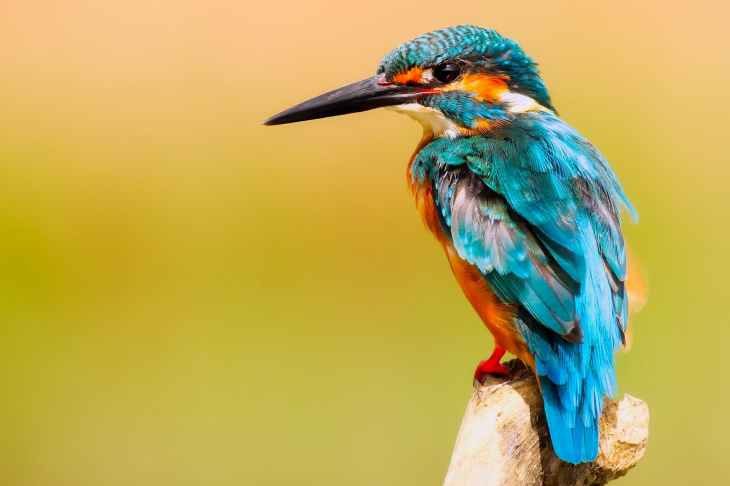

In [1]:
# ===============================
# STEP 1: Import Required Libraries
# ===============================
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow


# ===============================
# STEP 2: Upload Image from System
# ===============================
uploaded = files.upload()   # Choose any image file


# ===============================
# STEP 3: Read Uploaded Image
# ===============================
image_path = next(iter(uploaded))   # Get uploaded file name
image = cv2.imread(image_path)


# ===============================
# STEP 4: Display Image
# ===============================
cv2_imshow(image)


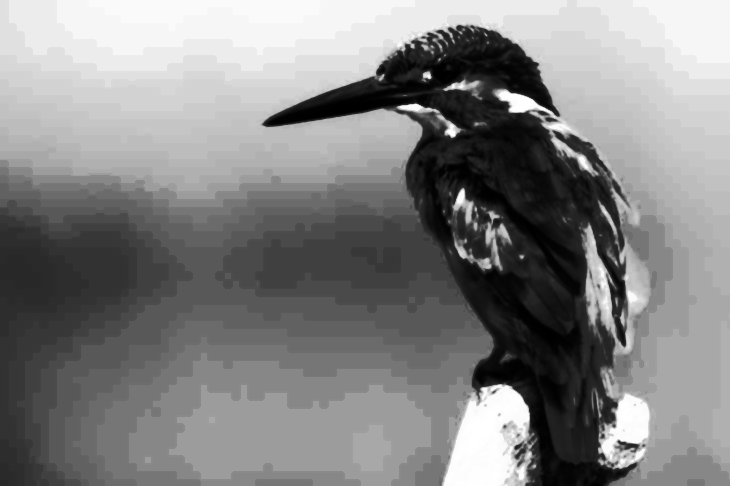

✅ Preprocessed image saved as 'preprocessed.jpg'


In [4]:
# ===============================
# STEP 1: Import Required Libraries
# ===============================
import cv2
from google.colab.patches import cv2_imshow


# ===============================
# STEP 2: Read Image
# ===============================
img = cv2.imread('/content/bird_photo.jpeg')

if img is None:
    raise FileNotFoundError("Image not found! Upload or capture 'acquired_image.jpg' first.")


# ===============================
# STEP 3: Preprocessing Steps
# ===============================

# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur (Noise Reduction)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Histogram Equalization (Contrast Enhancement)
equalized = cv2.equalizeHist(blur)


# ===============================
# STEP 4: Display Preprocessed Image
# ===============================
cv2_imshow(equalized)


# ===============================
# STEP 5: Save Preprocessed Image
# ===============================
cv2.imwrite('preprocessed.jpg', equalized)
print("✅ Preprocessed image saved as 'preprocessed.jpg'")


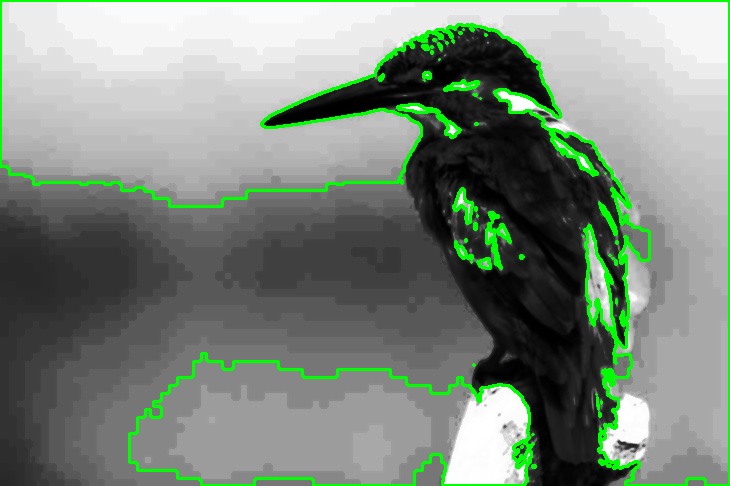

✅ Segmented image saved as 'segmented.jpg'


In [5]:
# ===============================
# STEP 1: Import Required Libraries
# ===============================
import cv2
from google.colab.patches import cv2_imshow


# ===============================
# STEP 2: Read Preprocessed Image
# ===============================
img = cv2.imread('preprocessed.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("preprocessed.jpg not found! Run preprocessing step first.")


# ===============================
# STEP 3: Binary Thresholding (Segmentation)
# ===============================
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


# ===============================
# STEP 4: Find Contours
# ===============================
contours, _ = cv2.findContours(
    thresh,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)


# ===============================
# STEP 5: Draw Contours on Original Image
# ===============================
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)


# ===============================
# STEP 6: Display Segmented Output
# ===============================
cv2_imshow(output)


# ===============================
# STEP 7: Save Segmented Image
# ===============================
cv2.imwrite('segmented.jpg', output)
print("✅ Segmented image saved as 'segmented.jpg'")


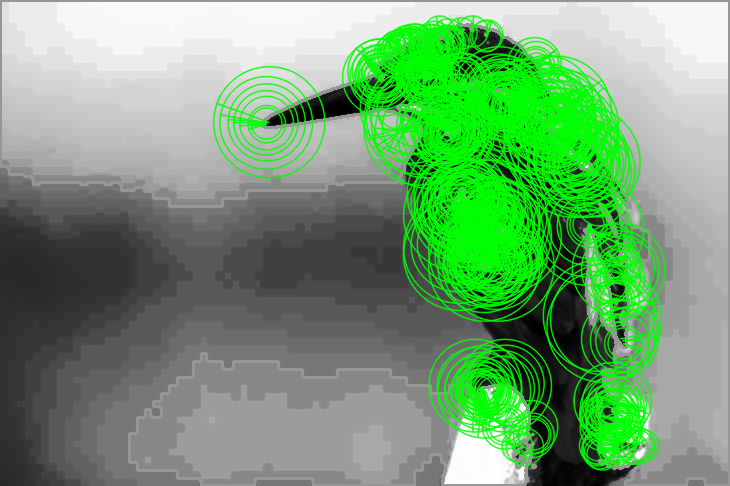

✅ Number of keypoints: 500
✅ Descriptor shape: (500, 32)


In [7]:
# ===============================
# STEP 1: Import Required Libraries
# ===============================
import cv2
from google.colab.patches import cv2_imshow


# ===============================
# STEP 2: Read Segmented Image
# ===============================
img = cv2.imread('segmented.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("segmented.jpg not found! Run segmentation step first.")


# ===============================
# STEP 3: Create ORB Detector
# ===============================
orb = cv2.ORB_create()


# ===============================
# STEP 4: Detect Keypoints and Compute Descriptors
# ===============================
keypoints, descriptors = orb.detectAndCompute(img, None)


# ===============================
# STEP 5: Draw Keypoints on Image
# ===============================
output = cv2.drawKeypoints(
    img,
    keypoints,
    None,
    color=(0, 255, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)


# ===============================
# STEP 6: Display Feature Image
# ===============================
cv2_imshow(output)


# ===============================
# (Optional) Check Descriptor Shape
# ===============================
if descriptors is not None:
    print("✅ Number of keypoints:", len(keypoints))
    print("✅ Descriptor shape:", descriptors.shape)
else:
    print("⚠️ No descriptors found")


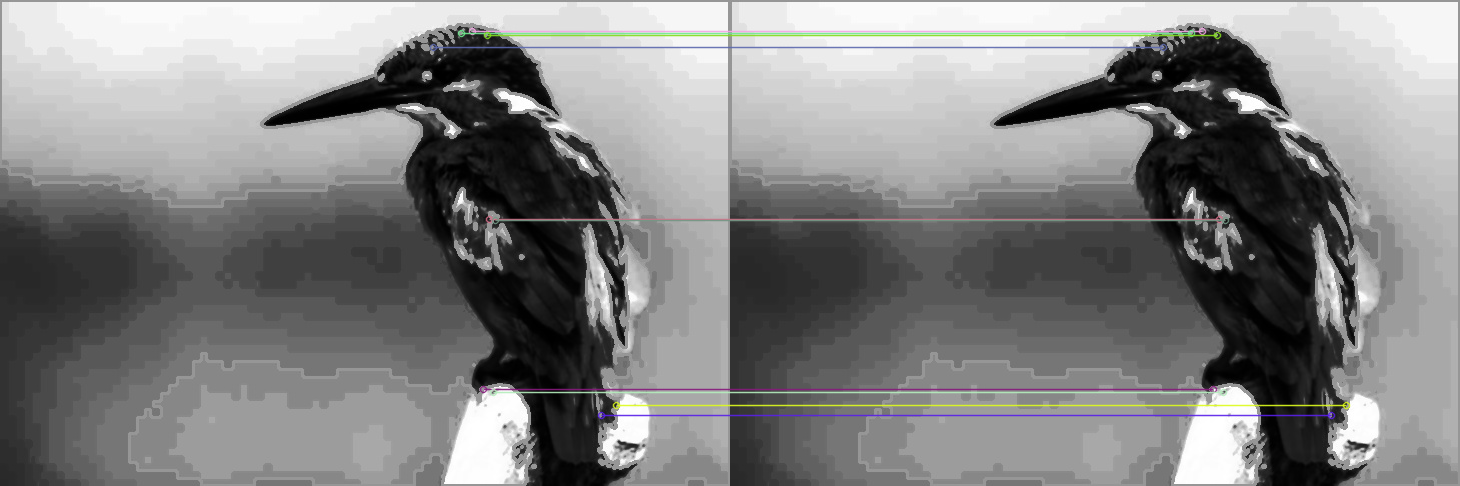

In [9]:
# ===============================
# STEP 1: Import Required Libraries
# ===============================
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# ===============================
# STEP 2: Read Images
# ===============================
img1 = cv2.imread('segmented.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('segmented.jpg', cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    raise FileNotFoundError("One or both images not found! Upload 'segmented.jpg' and 'another_image.jpg' first.")


# ===============================
# STEP 3: Create ORB Detector
# ===============================
orb = cv2.ORB_create()


# ===============================
# STEP 4: Detect Keypoints and Descriptors
# ===============================
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

if des1 is None or des2 is None:
    raise ValueError("Descriptors not found in one of the images.")


# ===============================
# STEP 5: Brute Force Matcher (Hamming Distance)
# ===============================
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)


# ===============================
# STEP 6: Sort Matches by Distance (Best First)
# ===============================
matches = sorted(matches, key=lambda x: x.distance)


# ===============================
# STEP 7: Draw Top Matches
# ===============================
output = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    matches[:10],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)


# ===============================
# STEP 8: Display Matches
# ===============================
cv2_imshow(output)


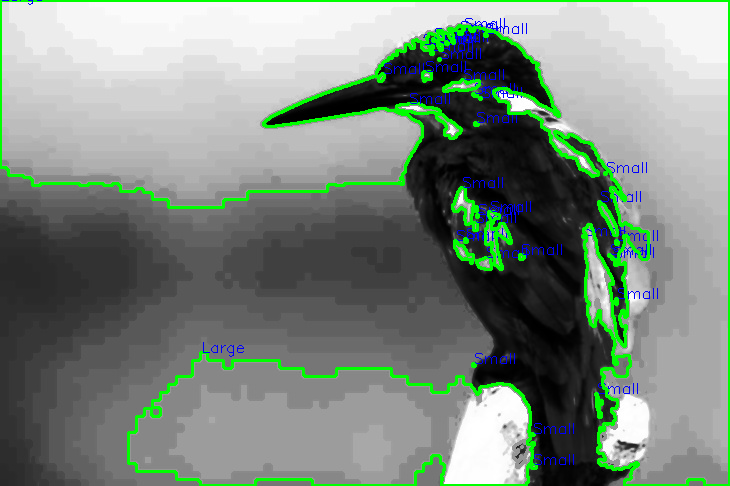

In [10]:
# ===============================
# STEP 1: Import Required Libraries
# ===============================
import cv2
from google.colab.patches import cv2_imshow


# ===============================
# STEP 2: Read Segmented Image
# ===============================
img = cv2.imread('segmented.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("segmented.jpg not found! Run previous steps first.")


# ===============================
# STEP 3: Ensure Binary Image (Important!)
# ===============================
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


# ===============================
# STEP 4: Find Contours
# ===============================
contours, _ = cv2.findContours(
    binary,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)


# ===============================
# STEP 5: Draw Contours and Classify by Area
# ===============================
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

for cnt in contours:
    area = cv2.contourArea(cnt)

    # Simple Rule-Based Classification
    label = "Large" if area > 1000 else "Small"

    # Draw contour
    cv2.drawContours(output, [cnt], -1, (0, 255, 0), 2)

    # Get position for text
    x, y = cnt[0][0]
    cv2.putText(
        output,
        label,
        (x, y),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (255, 0, 0),
        1
    )


# ===============================
# STEP 6: Display Classified Output
# ===============================
cv2_imshow(output)


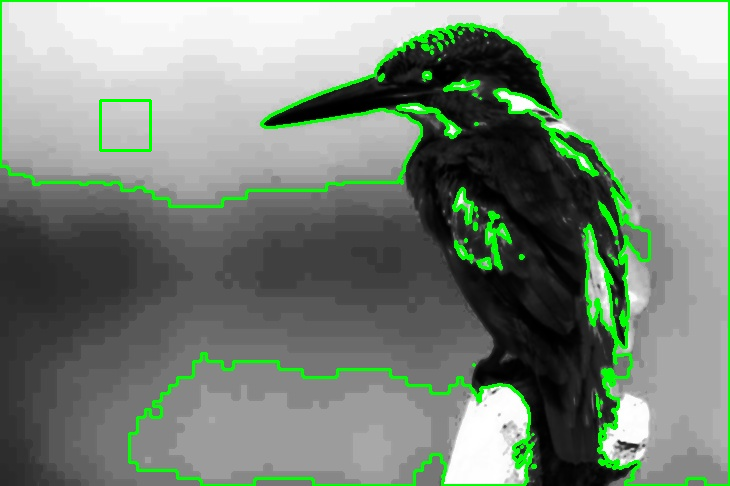

✅ Detected objects after NMS: 1
✅ Output saved as 'post_processed.jpg'


In [11]:
# ===============================
# STEP 1: Import Required Libraries
# ===============================
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# ===============================
# STEP 2: Example Detections
# Format: [x, y, w, h, score]
# ===============================
detections = np.array([
    [100, 100, 50, 50, 0.9],
    [105, 105, 50, 50, 0.8]
])


# ===============================
# STEP 3: Apply Non-Maximum Suppression (NMS)
# ===============================
boxes = detections[:, :4].tolist()
scores = detections[:, 4].tolist()

indices = cv2.dnn.NMSBoxes(
    boxes,
    scores,
    score_threshold=0.5,
    nms_threshold=0.4
)


# ===============================
# STEP 4: Read Image
# ===============================
img = cv2.imread('segmented.jpg')

if img is None:
    raise FileNotFoundError("segmented.jpg not found! Run previous steps first.")


# ===============================
# STEP 5: Draw Final Bounding Boxes
# ===============================
if len(indices) > 0:
    indices = indices.flatten()  # IMPORTANT for Colab/OpenCV compatibility

    for i in indices:
        x, y, w, h = detections[i, :4].astype(int)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


# ===============================
# STEP 6: Display Output
# ===============================
cv2_imshow(img)


# ===============================
# STEP 7: Save Output + Report
# ===============================
cv2.imwrite('post_processed.jpg', img)
print("✅ Detected objects after NMS:", len(indices))
print("✅ Output saved as 'post_processed.jpg'")
